In [2]:
import pandas as pd
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers
import matplotlib.pyplot as plt
import tensorflow as tf
import shap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from keras import regularizers

In [3]:
def plot_history():
  acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs2 = range(len(acc))

  plt.plot(epochs2, acc, label = 'Training acc')
  plt.plot(epochs2, val_acc, 'r', label = 'Validation_acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs2, loss, label = 'Training loss' )
  plt.plot(epochs2, val_loss, 'r', label = 'Validation loss')
  plt.title('Trainning and validation loss')
  plt.legend()

  plt.show()

In [5]:
base_train = '../input/braintumorlarge2c/large-2c/train'
base_test = '../input/braintumorlarge2c/large-2c/test'
base_val = '../input/braintumorlarge2c/large-2c/val'

In [6]:
base_train_no = os.path.join(base_train, 'no')
train_no = len(os.listdir(base_train_no))

base_train_yes = os.path.join(base_train,'yes')
train_yes = len(os.listdir(base_train_yes))

base_val_no = os.path.join(base_val, 'no')
val_no = len(os.listdir(base_val_no))

base_val_yes = os.path.join(base_val,'yes')
val_yes = len(os.listdir(base_val_yes))

total_train = train_no + train_yes
total_val = val_no + val_yes

print(total_train, total_val)

1800 600


In [7]:
train_data_generator = ImageDataGenerator(
     rotation_range = 90,
     horizontal_flip = True,
     rescale = 1./255
)
train_generator = train_data_generator.flow_from_directory(base_train, 
                                   target_size = (224, 224),
                                   batch_size = 32,
                                   class_mode = 'categorical',
                                   shuffle= True
                                   )

Found 1800 images belonging to 2 classes.


In [8]:
n = 0
data_train = []
label_train = []
for img, label in train_generator:
  n += 1
  if n == 58:
    break
  for element in img:
    data_train.append(element)
  for element in label:
    label_train.append(element)

In [9]:
data_train = np.array(data_train)
label_train = np.array(label_train)
print(data_train.shape, label_train.shape)

(1800, 224, 224, 3) (1800, 2)


In [10]:
val_data_generator = ImageDataGenerator(  rescale = 1./255)
val_generator = val_data_generator.flow_from_directory(base_val, 
                                   target_size = (224, 224),
                                   batch_size = 32,
                                   class_mode = 'categorical',
                                   shuffle = False
                                   )

Found 600 images belonging to 2 classes.


In [11]:
n = 0
data_val = []
label_val = []
for img, label in val_generator:
  n += 1
  if n == 20:
    break
  for element in img:
    data_val.append(element)
  for element in label:
    label_val.append(element)

In [12]:
data_val = np.array(data_val)
label_val = np.array(label_val)
print(data_val.shape, label_val.shape)

(600, 224, 224, 3) (600, 2)


In [13]:
test_data_generator = ImageDataGenerator( rescale = 1./255)
test_generator = test_data_generator.flow_from_directory(base_test, 
                                   target_size = (224, 224),
                                   batch_size = 32,
                                   class_mode = 'categorical',
                                   shuffle= False
                                   )

Found 600 images belonging to 2 classes.


In [14]:
n = 0
data_test = []
label_test = []
for img, label in test_generator:
  n += 1
  if n == 20:
    break
  for element in img:
    data_test.append(element)
  for element in label:
    label_test.append(element)

In [15]:
data_test = np.array(data_test)
label_test = np.array(label_test)
print(data_test.shape, label_test.shape)

(600, 224, 224, 3) (600, 2)


In [18]:
model = tf.keras.models.Sequential()

model.add(layers.Conv2D(32,(3,3), kernel_regularizer= regularizers.l2(0.001),activation= 'relu', input_shape = (224,224,3)  ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), kernel_regularizer = regularizers.l2(0.001), activation = 'relu' ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), kernel_regularizer = regularizers.l2(0.001) ,activation = 'relu' ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            

In [19]:
model.add(layers.Dense(500, activation = 'relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(250, activation ='relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam( learning_rate= 0.001 ),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()] ,
)
epochs = 50
history = model.fit(train_generator,
                    steps_per_epoch = int(np.ceil(total_train/float(32))),
                    epochs=epochs, 
                    validation_data= val_generator,
                    validation_steps=int(np.ceil(total_val / float(32)))
                    )

2022-10-06 13:44:26.937335: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-10-06 13:44:29.241488: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


57/57 [==============================] - 35s 483ms/step - loss: 0.7743 - categorical_accuracy: 0.7222 - val_loss: 0.5907 - val_categorical_accuracy: 0.7267
Epoch 2/50
57/57 [==============================] - 27s 469ms/step - loss: 0.5821 - categorical_accuracy: 0.7789 - val_loss: 0.5782 - val_categorical_accuracy: 0.7783
Epoch 3/50
57/57 [==============================] - 25s 446ms/step - loss: 0.5437 - categorical_accuracy: 0.7922 - val_loss: 0.5124 - val_categorical_accuracy: 0.8050
Epoch 4/50
57/57 [==============================] - 25s 443ms/step - loss: 0.5038 - categorical_accuracy: 0.8033 - val_loss: 0.4634 - val_categorical_accuracy: 0.8233
Epoch 5/50
57/57 [==============================] - 25s 442ms/step - loss: 0.4686 - categorical_accuracy: 0.8200 - val_loss: 0.4360 - val_categorical_accuracy: 0.8417
Epoch 6/50
57/57 [==============================] - 25s 434ms/step - loss: 0.4444 - categorical_accuracy: 0.8300 - val_loss: 0.4715 - val_categorical_accuracy: 0.8317
Epoch 7/5

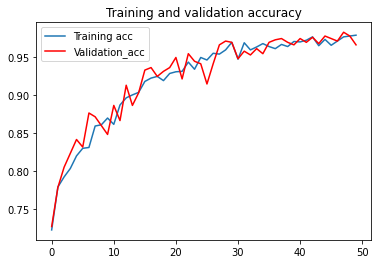

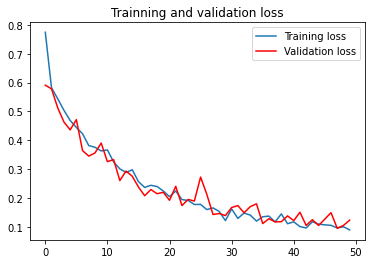

In [21]:
plot_history() 

In [22]:
val_loss = history.history['val_loss']
val_loss_mean = np.mean(val_loss)

loss = history.history['loss']
loss_mean = np.mean(loss)

accuracy = history.history['categorical_accuracy']
accuracy_mean = np.mean(accuracy)

val_accuracy = history.history['val_categorical_accuracy']
val_accuracy_mean = np.mean(val_accuracy)

print(f'val_loss_mean = {val_loss_mean} e loss_mean = {loss_mean}')
print(f'val_accuracy_mean = {val_accuracy_mean} e accuracy_mean = {accuracy_mean}')

val_loss_mean = 0.23329464688897134 e loss_mean = 0.23584482237696647
val_accuracy_mean = 0.9247333359718323 e accuracy_mean = 0.9216333317756653


In [23]:
model.evaluate(test_generator)

19/19 [==============================] - 2s 128ms/step - loss: 0.1757 - categorical_accuracy: 0.9483


[0.17568807303905487, 0.9483333230018616]

In [24]:
pred = model.predict(test_generator)
predict = np.argmax(pred, axis=1)
predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [25]:
score = accuracy_score(test_generator.classes,predict)
score

0.9483333333333334

              precision    recall  f1-score   support

      normal       0.95      0.95      0.95       300
       tumor       0.95      0.95      0.95       300

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



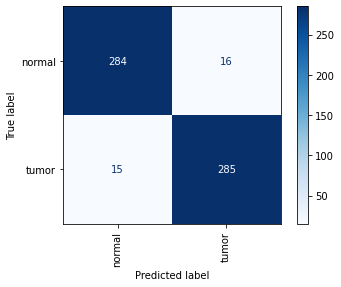

In [26]:
classes_names = ['normal','tumor']
print(classification_report(test_generator.classes,predict, target_names=classes_names))
cm = confusion_matrix(test_generator.classes, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= classes_names)

disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.show()

### Find the labels wrong and filenames
This process os important because after we'll use that value to apllied in the SHAP

In [27]:
filenames = test_generator.filenames
filenames

filenames_wrong = []
labels_wrong = []
labels_correct = []

for indice in range(600):
    if predict[indice] != test_generator.classes[indice]:
        filenames_wrong.append(filenames[indice])
        labels_wrong.append(predict[indice])
        labels_correct.append(test_generator.classes[indice])

In [28]:
print(len(labels_wrong), len(labels_correct))

31 31


In [29]:
print(f'labels_wrong = {labels_wrong} \nlabels_correct = {labels_correct}')

labels_wrong = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
labels_correct = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
base_dir = '../input/braintumorlarge2c/large-2c/test/'
images_wrong = []
for image in filenames_wrong:
    images_wrong.append(cv2.imread(base_dir + image))

In [31]:
images_wrong = np.array(images_wrong)
images_wrong[0].shape

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(259, 194, 3)

In [32]:
from skimage.transform import resize
images_wrong_resize = []
for image in images_wrong:
    images_wrong_resize.append(resize(image, (224, 224,3), anti_aliasing = True ))
images_wrong_resize = np.array(images_wrong_resize)
images_wrong_resize.shape

(31, 224, 224, 3)

### Encontrando as images que foramm classificadas corretamente pelo modelo

In [33]:
filenames = test_generator.filenames
filenames

filenames_correct = []
labels_true = []

for indice in range(600):
    if predict[indice] == test_generator.classes[indice]:
        filenames_correct.append(filenames[indice])
        labels_true.append(predict[indice])

In [34]:
len(filenames_correct)

569

In [35]:
base_dir_correct = '../input/braintumorlarge2c/large-2c/test/'
images_correct = []
for image in filenames_correct:
    images_correct.append(cv2.imread(base_dir_correct + image))

In [36]:
images_correct = np.array(images_correct)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [37]:
images_correct_resize = []
for image in images_correct:
    images_correct_resize.append(resize(image, (224, 224,3), anti_aliasing = True ))
images_correct_resize = np.array(images_correct_resize)
images_correct_resize.shape

(569, 224, 224, 3)

### Aplicando o SHAP para entender melhor a tomada de decisão do modelo

In [38]:
print(labels_wrong, labels_correct)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [40]:
X =np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
print(X.shape)

(1800, 224, 224, 3)


### Classificação errada do modelo
#### 1) Classificou com anomalia uma claase normal 

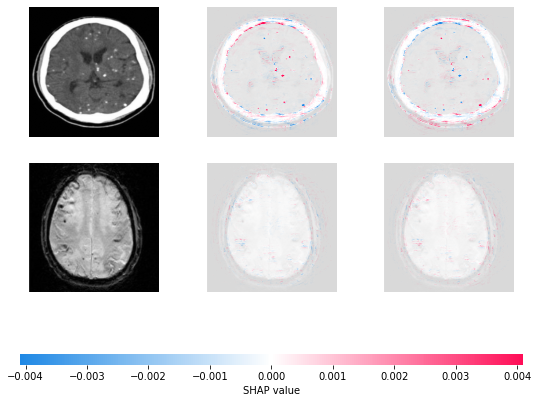

In [51]:
explainer = shap.GradientExplainer(model, X )

shap_values = explainer.shap_values(images_wrong_resize[4:6] )
#masker = shap.maskers.Image("inpaint_telea", data_train[0].shape)


#explainer = shap.Explainer(f, masker, output_names=class_names)

shap.image_plot([shap_values[i] for i in range(2)], images_wrong_resize[4:6])

In [52]:
print(labels_wrong[4:6], labels_correct[4:6])

[1, 1] [0, 0]


#### 2) Aqui uma classe com anormalidade foi claassificada como normal 

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


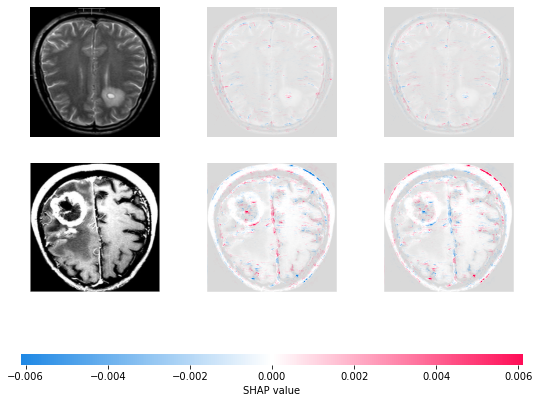

In [41]:
explainer = shap.GradientExplainer(model, X)

shap_values = explainer.shap_values(images_wrong_resize[-3:-1])
#masker = shap.maskers.Image("inpaint_telea", data_train[0].shape)


#explainer = shap.Explainer(f, masker, output_names=class_names)

shap.image_plot([shap_values[i] for i in range(2)], images_wrong_resize[-3:-1])

### Classificação correta do modelo
#### 1) classe normal classficada corretamente

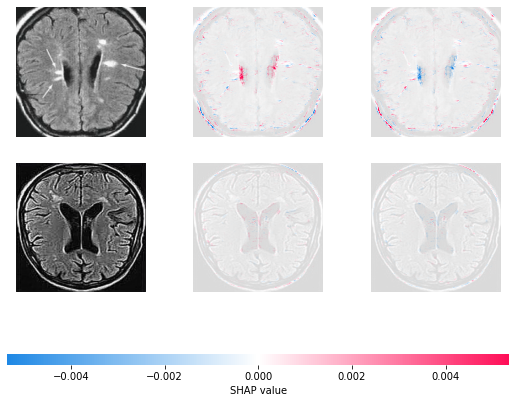

In [43]:
explainer = shap.GradientExplainer(model, X )

shap_values = explainer.shap_values(images_correct_resize[1:3] )
#masker = shap.maskers.Image("inpaint_telea", data_train[0].shape)


#explainer = shap.Explainer(f, masker, output_names=class_names)

shap.image_plot([shap_values[i] for i in range(2)], images_correct_resize[1:3])

#### Classe com anomalia classificada corretamente

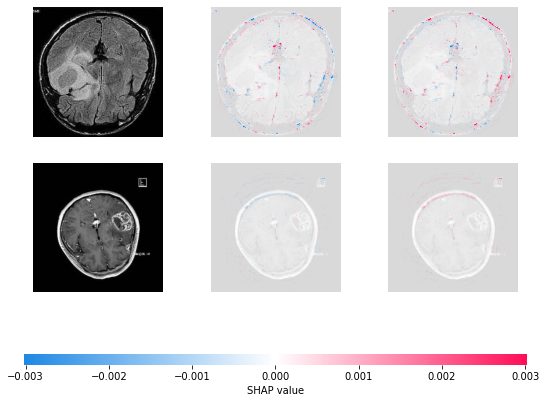

In [61]:
explainer = shap.GradientExplainer(model, X )

shap_values = explainer.shap_values(images_correct_resize[-12:-10] )
#masker = shap.maskers.Image("inpaint_telea", data_train[0].shape)


#explainer = shap.Explainer(f, masker, output_names=class_names)

shap.image_plot([shap_values[i] for i in range(2)], images_correct_resize[-12:-10])
# anomalia classificada correta ( binária )

In [57]:
labels_correct[-15:-13]

[1, 1]